# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Matt\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


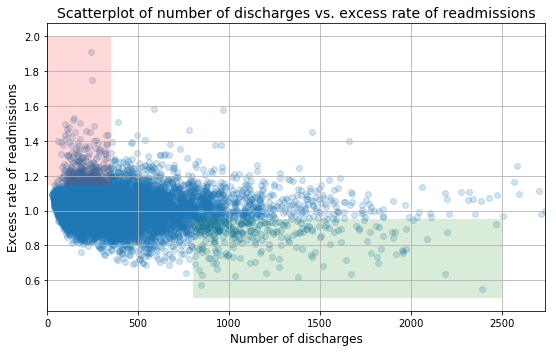

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A - recommendations seems logical, but no p-values or any other metrics of worth are given other than the scatter. Perhaps some hospital intuition is required, but why were the red and green boxes chosen in the locations they are (other than excess readmissions greater than 1 being undesirable)?

LARGE
SMALL
MEDIUM


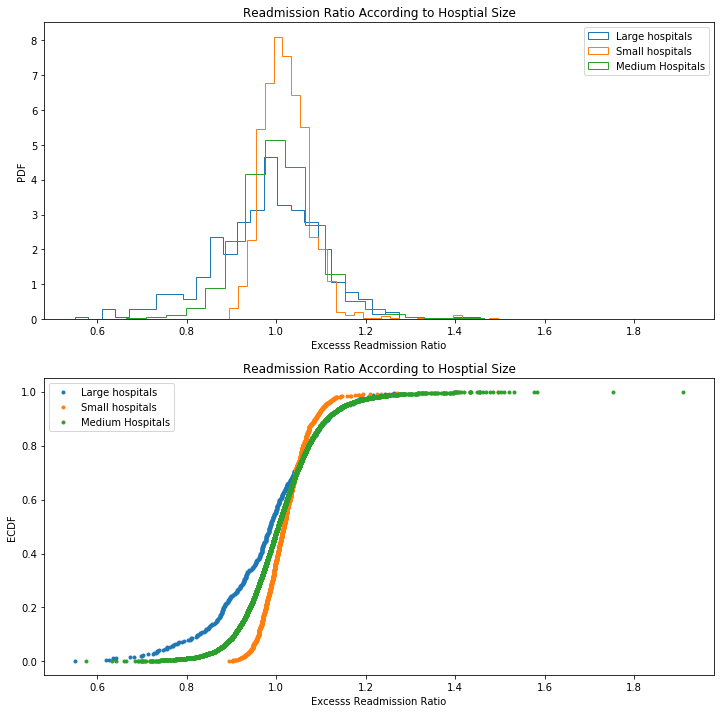

In [7]:
df = hospital_read_df

# Drop irrelevant columns
df = df[['Number of Discharges', 'Excess Readmission Ratio']]

# Drop rows that are missing Discharge information 
df = df[df['Number of Discharges'] != 'Not Available']
df['Number of Discharges'] = pd.to_numeric(df['Number of Discharges'])

# Drop nulls 
df.dropna(axis=0, how='any', subset=['Excess Readmission Ratio'], inplace=True)


# Separate observations by hospital size
large = df[df['Number of Discharges'] >= 1000]
small = df[df['Number of Discharges'] <= 100]
medium = df[df['Number of Discharges'] < 1000] ## double inequalality not working

# EDA
# Descriptive statistics 
print('LARGE')
large['Excess Readmission Ratio'].describe()
print('SMALL')
small['Excess Readmission Ratio'].describe()
print('MEDIUM')
large_mean = np.mean(large['Excess Readmission Ratio'])
small_mean = np.mean(small['Excess Readmission Ratio'])
medium_mean = np.mean(medium['Excess Readmission Ratio'])

# Compute ecdfs
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

x_large, y_large = ecdf(large['Excess Readmission Ratio'])
x_small, y_small = ecdf(small['Excess Readmission Ratio'])
x_med, y_med = ecdf(medium['Excess Readmission Ratio'])

# Examine differences visually
fig = plt.figure(figsize=(12, 12))
_ = plt.subplot(2,1,1)
_ = plt.hist(large['Excess Readmission Ratio'], bins=30, normed=True, histtype='step')
_ = plt.hist(small['Excess Readmission Ratio'], bins=30, normed=True, histtype='step')
_ = plt.hist(medium['Excess Readmission Ratio'], bins=30, normed=True, histtype='step')
_ = plt.xlabel('Excesss Readmission Ratio')
_ = plt.ylabel('PDF')
_ = plt.title('Readmission Ratio According to Hosptial Size')
_ = plt.legend(('Large hospitals', 'Small hospitals','Medium Hospitals'))

_ = plt.subplot(2,1,2)
_ = plt.plot(x_large, y_large, marker='.', linestyle='none')
_ = plt.plot(x_small, y_small, marker='.', linestyle='none')
_ = plt.plot(x_med, y_med, marker='.', linestyle='none')
_ = plt.ylabel('ECDF')
_ = plt.xlabel('Excesss Readmission Ratio')
_ = plt.title('Readmission Ratio According to Hosptial Size')
_ = plt.legend(('Large hospitals', 'Small hospitals','Medium Hospitals'))

In [8]:
# Null hypothesis: The distributions of ERR for large and small hospitals are identical.
# Define test statistic 
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays"""
    return np.mean(data_1) - np.mean(data_2)

# Compute test statistic for observed data
diff_obs = diff_of_means(large['Excess Readmission Ratio'], small['Excess Readmission Ratio'])

# Draw permutation replicates
perm_replicates = np.empty(100000)
for i in range(len(perm_replicates)): 
    # Permute the data
    both = np.concatenate((large['Excess Readmission Ratio'], small['Excess Readmission Ratio']))
    both_perm = np.random.permutation(both)
    perm_large = both_perm[:len(large)]
    perm_small = both_perm[len(large):]
    #Draw replicates
    perm_replicates[i] = diff_of_means(perm_large, perm_small)

# Compute the p-value
p_value = np.sum(abs(perm_replicates) >= abs(diff_obs)) / len(perm_replicates)

print('observed difference:',diff_obs)
print('p-value:',p_value)

observed difference: -0.04375412196548689
p-value: 0.0


## From this we see in 100,000 replicates, there were 0 instances which shared a greater magnitude in difference of means. With this, we can say with confidence that readmission rates are statisitically different in small and large hospitals. The next step is to identify the process which occurs in large hopsitals that is not being done in small hospitals.